In [431]:
%run ../prepare_data.py - N 10
df_train = df_sequence.reshape(sequence.shape[0],sequence.shape[1],1)

In [487]:
%run ../prepare_data.py - N 1
df_test = df_sequence.reshape(sequence.shape[0],sequence.shape[1],1)


D:\Users\greg_\Anaconda3\lib\site-packages\pandas\core\indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
D:\Users\greg_\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


(10000, 81, 1)


In [490]:
df_train = df_train[:j,:,:]

In [491]:
df_train.shape

(1924, 81, 1)

In [492]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, Dropout
from keras.optimizers import RMSprop, adam
from keras.utils.data_utils import get_file
from keras.callbacks import History, ModelCheckpoint
import numpy as np
import pandas as pd
import random
import sys
import string
import matplotlib.pyplot as plt
%matplotlib inline


# Define number of inputs/outputs to handle
input_size = 16
output_size= 1

# Load the train data
...

print('Train total outputs:', output_size)

# Pre-process the data (normalize)

# cut the input in semi-redundant sequences of maxlen characters
maxlen = 60
step_days = 1



def reformat(df):
    max_sequences = 10**5
    days_sequence = np.empty((max_sequences,maxlen,input_size),dtype=int)
    next_day = np.empty((max_sequences,output_size),dtype=int)
    j=0

    for woman_i in range(0,df.shape[2]):
        for day_i in range(0, df.shape[0] - maxlen, step_days):
            days_sequence[j] = df[day_i: day_i + maxlen,:input_size,woman_i]
            next_day[j] = df[day_i + maxlen,:output_size,woman_i]
            j += 1
    days_sequence = days_sequence[:j,:,:]
    next_day = next_day[:j,:]
    
    return days_sequence,next_day
        
print('Train nb sequences:', len(days_sequence))

X_train, y_train = reformat(df_train)
X_test,y_test=reformat(df_test)


Train total outputs: 1
Train nb sequences: 103


In [493]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1864, 60, 16)
(1864, 1)
(17, 60, 16)
(17, 1)


In [494]:
def plot_logs(history):
    """
    Plot the accuracy and loss for 
        training and test sets
    """
    evaluation_cost = history.history['val_loss']
    evaluation_accuracy = history.history['val_acc']
    training_cost = history.history['loss']
    training_accuracy = history.history['acc']
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figwidth(10)
    ax1.plot(evaluation_cost,label= 'test')
    ax1.plot(training_cost, label='train')
    ax1.set_title('Cost')
    ax1.legend()
    ax2.plot(evaluation_accuracy, label='test')
    ax2.plot(training_accuracy, label='train')
    ax2.set_title('Accuracy')
    ax2.legend(loc='lower right')


def sample(preds, temperature=1.0):
    """
    Generate the next sequence
    Low temperature means very conservative (picks more probable most of the time)
    High temperature means very adventurous (picks less probable more frequently)
    """
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

def generate_prediction(history,days=28, maxlen=60, input_size=16, output_size=16, diversity=1):
    """
    Generates as many days of prediction as requested
    Considers maxlen days of past history (must be aligned with model)
    """
    generated = np.zeros((days,output_size))
    if history.shape[1]>60:
        x = history[:,-61:-1,:input_size]
    else:
        x = history[:,:,:input_size]
    #print(x.shape)
    for i in range(days):
        #print("Day %d" % i)
        preds = model.predict(x, verbose=0)[0]
        #print(preds)
        #next_symptoms = sample(preds, diversity)
        next_symptoms = preds
        #print(next_symptoms)

        generated[i,:] = next_symptoms
        x[:,:maxlen-1,:] = x[:,1:,:]
        x[:,maxlen-1,:] = next_symptoms

    return generated

Build model...
Train on 1864 samples, validate on 17 samples
Epoch 1/50
1864/1864 [==============================] - 8s - loss: 0.6359 - acc: 0.7650 - val_loss: 0.3404 - val_acc: 0.9412
Epoch 2/50
1864/1864 [==============================] - 1s - loss: 0.2209 - acc: 0.9796 - val_loss: 0.2412 - val_acc: 0.9412
Epoch 3/50
1864/1864 [==============================] - 1s - loss: 0.1007 - acc: 0.9796 - val_loss: 0.2808 - val_acc: 0.9412
Epoch 4/50
1864/1864 [==============================] - 1s - loss: 0.1014 - acc: 0.9796 - val_loss: 0.2675 - val_acc: 0.9412
Epoch 5/50
1864/1864 [==============================] - 1s - loss: 0.1017 - acc: 0.9796 - val_loss: 0.2426 - val_acc: 0.9412
Epoch 6/50
1864/1864 [==============================] - 1s - loss: 0.1013 - acc: 0.9796 - val_loss: 0.2396 - val_acc: 0.9412
Epoch 7/50
1864/1864 [==============================] - 1s - loss: 0.1012 - acc: 0.9796 - val_loss: 0.2512 - val_acc: 0.9412
Epoch 8/50
1864/1864 [==============================] - 1s - los

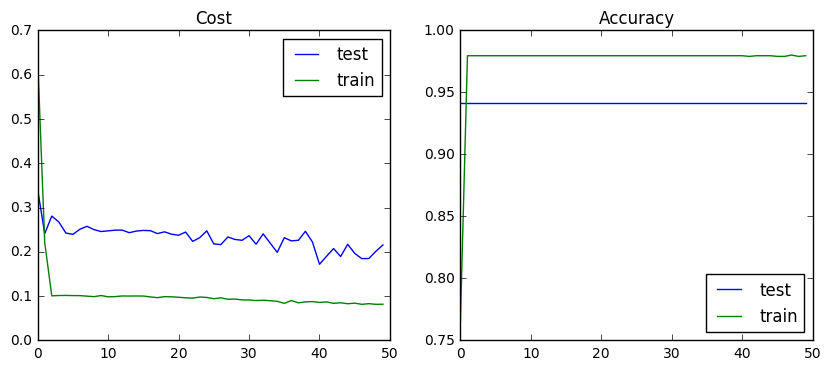

In [496]:
# Model params
batch_size = 512
nb_epoch = 50
np.random.seed(131078)

# build the model
print('Build model...')

"""
filepath="lstm_1_layer.hdf5"
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, input_size)))
model.add(Dense(output_size))
model.add(Activation('sigmoid'))

"""
filepath="lstm_2_layers.hdf5"
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, input_size), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(128))
model.add(Dropout(0.1))
model.add(Dense(output_size))
model.add(Activation('sigmoid'))


optimizer = adam()
model.compile(loss='binary_crossentropy', 
              optimizer=optimizer,
              metrics=['accuracy'])

# Define callback to save model
save_snapshots = ModelCheckpoint(filepath,
                                 monitor='loss',
                                 save_best_only=True,
                                 save_weights_only=True,
                                 mode='min',
                                 verbose=0)
callbacks_list = [save_snapshots]

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    nb_epoch=nb_epoch,
                    validation_data=(X_test, y_test),
                    callbacks=callbacks_list,
                    verbose=1)          

score = model.evaluate(X_test, y_test, verbose=2)
print('Test score:', score[0])
print('Test accuracy:', score[1])  

plot_logs(history)          


In [463]:
res = generate_prediction(X_test[0,:,:].reshape(1,60,-1),input_size=input_size,output_size=output_size)
res.shape

(28, 1)

In [464]:
res[:,:output_size]


array([[ 0.04611705],
       [ 0.04630696],
       [ 0.04635759],
       [ 0.04639602],
       [ 0.04642505],
       [ 0.04644674],
       [ 0.04646286],
       [ 0.04647456],
       [ 0.04648277],
       [ 0.04648822],
       [ 0.04649137],
       [ 0.04649263],
       [ 0.04649237],
       [ 0.04649078],
       [ 0.04648809],
       [ 0.04648455],
       [ 0.04648026],
       [ 0.04647543],
       [ 0.04647015],
       [ 0.04646459],
       [ 0.04645879],
       [ 0.04645286],
       [ 0.0464468 ],
       [ 0.04644077],
       [ 0.04643479],
       [ 0.04642896],
       [ 0.04642337],
       [ 0.04641799]])

In [465]:
y_test[:28,:output_size]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])